In [113]:
import matplotlib.pyplot as plt
import seaborn           as sns
from scipy import interpolate

import numpy             as np
import pandas            as pd

from sklearn.metrics import classification_report

In [8]:
DATASET_PATH = '../../datasets/fashion-outfits'

In [28]:
bert_test_results = pd.read_csv(f'{DATASET_PATH}/bert-pred-target.csv')

In [25]:
bert_test_results.head(3)

,predictions,target
0,clothing~sweaters & knitwear~hoodies,clothing~sweaters & knitwear~hoodies
1,clothing~trousers~track pants,clothing~trousers~track pants
2,clothing~tops~vests & tank tops,clothing~tops~t-shirts & jerseys


In [53]:
class ClassicationReportGenerator:
    def classification_report_to_df(sef, report):
        rows = []
        for clazz, metrics in report.items():
            if type(metrics) != float:
                metrics['class'] = clazz
                rows.append(metrics)

        df = pd.DataFrame(rows)

        selected = [df.columns[-1]]
        selected.extend(df.columns[:-1])
        return df[selected]

    def generate(self, targets, predictions):
        report = classification_report(targets, predictions, output_dict = True)
        return self.classification_report_to_df(report)

In [54]:
report_generator = ClassicationReportGenerator()

report_df = report_generator.generate(
    targets     = bert_test_results.target.values,
    predictions = bert_test_results.predictions.values
)

In [56]:
report_df.corr()

,precision,recall,f1-score,support
precision,1.000000,0.568093,0.906271,0.047914
recall,0.568093,1.000000,0.849591,0.023575
f1-score,0.906271,0.849591,1.000000,0.041915
support,0.047914,0.023575,0.041915,1.000000


In [76]:
report_df

,class,precision,recall,f1-score,support
0,accessories~belts~n/d,0.979167,0.965753,0.972414,146
1,accessories~hats~n/d,0.944238,1.000000,0.971319,254
2,accessories~scarves~n/d,0.972332,0.984000,0.978131,2000
3,accessories~sunglasses~n/d,1.000000,1.000000,1.000000,186
4,activewear~performance tops~sports bras,0.793333,0.944444,0.862319,126
...,...,...,...,...,...
130,shoes~sandals~n/d,0.956772,0.932584,0.944523,356
131,shoes~trainers~low-tops,0.968391,0.988270,0.978229,341
132,shoes~trainers~n/d,0.992908,0.955631,0.973913,293
133,macro avg,0.762992,0.781477,0.757788,111253


<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 1 Axes>

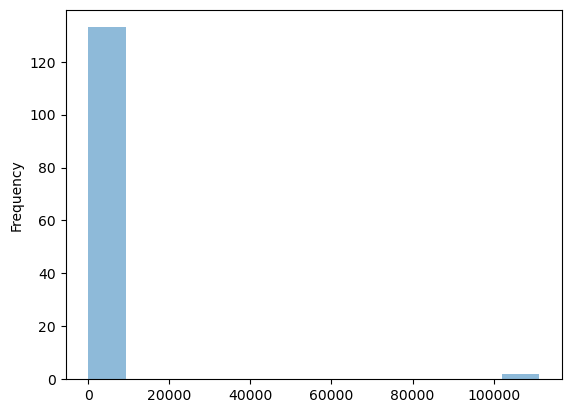

In [82]:
report_df.support.plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 1 Axes>

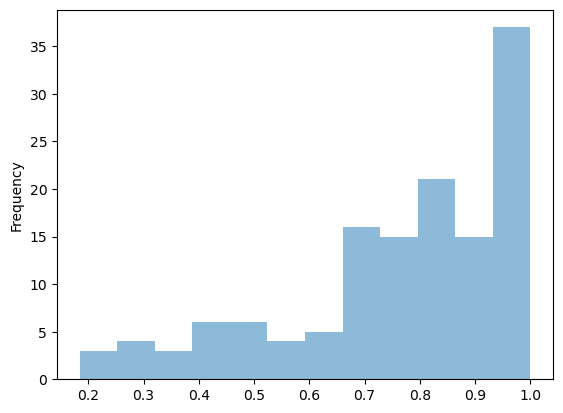

In [83]:
report_df.precision.plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 1 Axes>

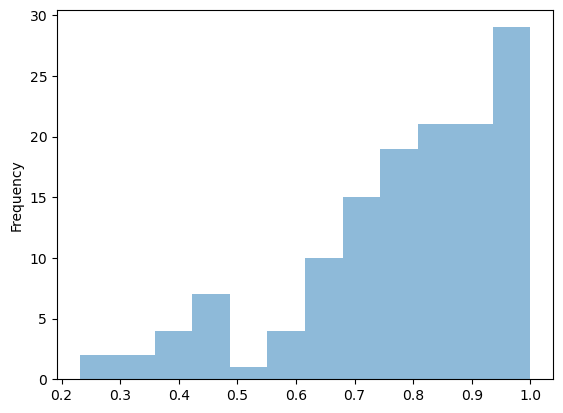

In [84]:
report_df.recall.plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 1 Axes>

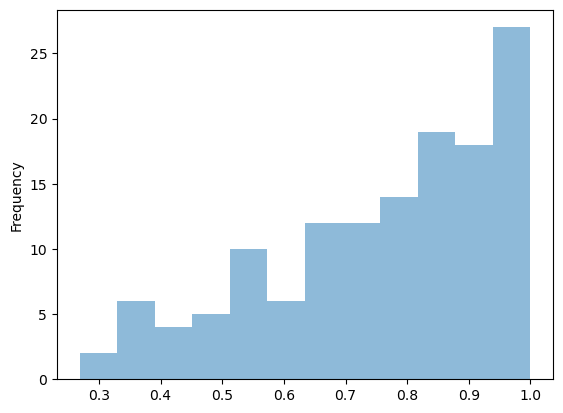

In [104]:
report_df['f1-score'].plot.hist(bins=12, alpha=0.5)

In [126]:
data = report_df[report_df.support < 10000]

<AxesSubplot:xlabel='support', ylabel='f1-score'>

<Figure size 640x480 with 1 Axes>

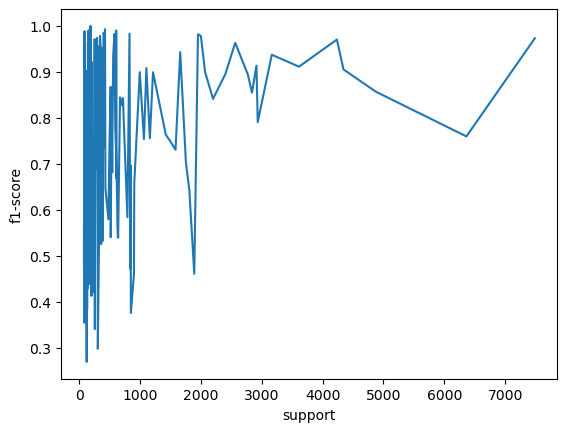

In [127]:
sns.lineplot(x = data.support, y=data['f1-score'])